# Problem Statement

Banks face significant challenges in retaining their customers, as customer churn directly impacts profitability and operational efficiency. Customer churn in the banking sector occurs when customers close their accounts or switch to competitors, often due to dissatisfaction with services, lack of engagement, or more attractive offerings elsewhere.

The objective of this project is to analyze and predict customer churn for a bank using historical data. The dataset includes features such as customer demographics, account balance, credit score, tenure with the bank, and usage patterns of banking services.

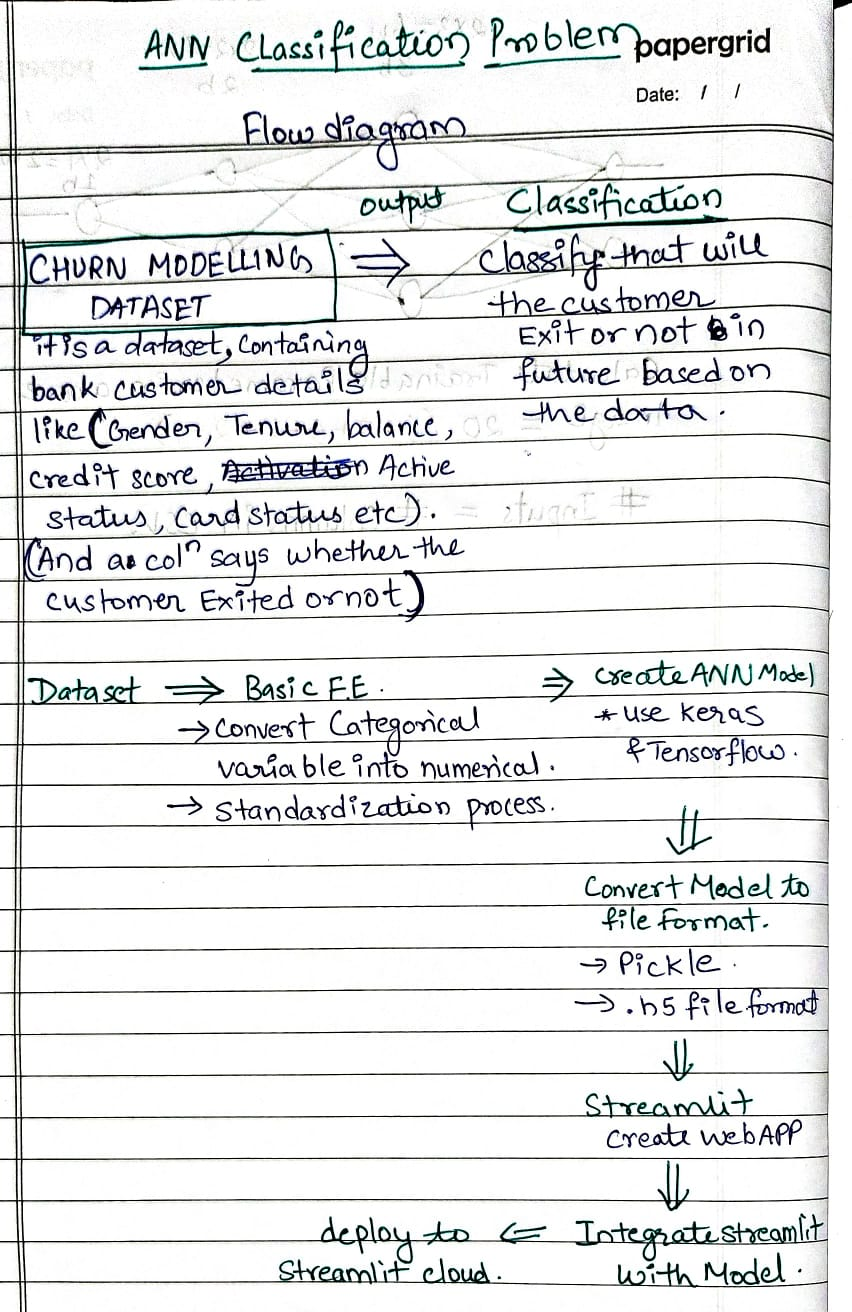

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

### Step1: Preprocessing of data

##### 1. Importing CSV files
##### 2. Removing un necessary data like RowNo, CustId, Surname
##### 3. Converting categorical variable into numerical variable.
#####    - Using Label encoder to convert Gender to numerical value.
#####    - Using One hot encoder to convert Geography to numerical value.

In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Lable Encoder:

A Label Encoder is a tool commonly used in machine learning to convert categorical data into numerical data. Many machine learning models work only with numerical data, so categorical data (like strings or labels) needs to be converted into a numerical format.

Label Encoder assigns a unique integer to each category in a column, mapping categories to numbers in a straightforward way. 

["Red", "Green", "Blue", "Green", "Red"] --> [0, 1, 2, 1, 0]

### fit_transformer
The fit_transform method is a combined function, combination of fit and transform. It’s a single command that does two things:

##### Fit:
 - It learns something about your data (like relationships, patterns, or statistics).
 - For example:
    1. In Label Encoding, it maps unique labels to integers.
    2. In Standard Scaling, it calculates the mean and standard deviation.
    3. In Imputation, it calculates statistics (like mean or median) for missing values.

##### Transform:
 - It changes your data based on what it learned.
 - For example:
    1. In Label Encoding, it replaces each category with its corresponding integer.
    2. In Standard Scaling, it scales the data using the previously learned mean and standard deviation.

##### Use When?
It’s used to prepare your data so it can work better with a machine learning model. Think of it as cleaning and organizing your data before you use it (like converting categories, scaling numbers, or filling missing values).



In [6]:
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data # 0 female 1 male

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


### Why can't use label encoding for Geography?

We cannot use Label Encoding for features like "Geography" because it assigns numerical integers directly to each category. For example, it might assign 0 to "France," 1 to "Italy," and 2 to "Germany." Since Artificial Neural Networks (ANNs) operate on numerical values, they may mistakenly interpret these numbers as indicating an order or importance (e.g., "Germany" > "Italy" > "France"). This interpretation is incorrect, as these categories are not having any ranking.

To avoid this issue and ensure that each category is treated equally, we use One-Hot Encoding. 

In [10]:
data[['Geography']] #The double brackets [['Geography']] are used to return a DataFrame with that single column, rather than a Series.

,Geography
0,France
1,Spain
2,France
3,France
4,Spain
...,...
9995,France
9996,France
9997,France
9998,Germany


In [142]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

##### Problem
- The output of OneHotEncoder.fit_transform() is a sparse matrix (by default).
- When you try to create a Pandas DataFrame directly from this sparse matrix: Pandas will not interpret the sparse matrix  properly, and it assumes there is only 1 column, causing error: ValueError: Shape of passed values is (10000, 1), indices imply (10000, 3)
##### Solution: 
- Convert to numpy array
- Pandas automatically understands the shape of the NumPy array and creates a DataFrame where each row corresponds to a row in the NumPy array, and each column corresponds to a column in the array.

In [143]:
geo_encoder = geo_encoder.toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [144]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [145]:
#Converting sparse matrix to dataframe
df_geo = pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
df_geo

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [146]:
## Combine one hot encoder columns with the original data
data = pd.concat([data.drop(['Geography'], axis=1), df_geo], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


## Pickle Files
A Pickle file is a file format used to serialize and deserialize Python objects. The pickle module in Python allows you to convert Python objects (such as lists, dictionaries, models, etc.) into a byte stream and save them in a file. This byte stream can later be read back and converted (or "deserialized") back into the original Python object.

In simpler terms:
- Serialization: (or "pickling") is the process of converting a Python object into a format that can be saved to a file or transmitted.
- Deserialization (or "unpickling") is the process of converting that byte stream back into a Python object.

#### Use of Pickle Files:
Saving Models, Saving data, sharing python object, Storing object in DB.

## Step 2: Storing data in pickle file and segregating data

In [147]:
# Storing Encoder Objects into pickle files
with open('label_encoder_gender.pkl','wb') as file: #write byte
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [148]:
# Divide data into dependent and independent features
dep = data['Exited']
indep = data.drop('Exited', axis=1)

# Divinding test and training data
indep_train, indep_test, dep_train, dep_test = train_test_split(indep, dep, test_size=0.2, random_state=42)

test_size=0.2 means 20% of the data is used for testing, and 80% is used for training.

##### random_state:
It controls the random shuffling of the dataset before splitting. ***shuffling ensures the split is representative of the overall dataset***

 - If random_state is a specific integer (e.g., 42), then random shuffling will produce the same sequence of dataset for split everytime. 
    - First Split:
        - Training: [8, 1, 5, 4, 7, 10, 3, 6]
        - Testing: [2, 9]

    - Second Split (Same random_state):
        - Training: [8, 1, 5, 4, 7, 10, 3, 6]
        - Testing: [2, 9]

 - If random_state=None (default), the dataset provided to split after shuffling will be random, So you will get different splits each time you run the code. which is ***Not good*** for debugging
    - Run 1:
        - Training: [7, 2, 9, 4, 1, 8, 3, 5]
        - Testing: [10, 6]

    - Run 2:
        - Training: [6, 4, 1, 7, 10, 3, 5, 2]
        - Testing: [8, 9]

## Step 3: Scaling data
#### What Does Scaling Do?
Imagine you are comparing apples and oranges:

Apples weigh in grams (e.g., 200 grams each).
Oranges are priced in dollars (e.g., $2 each).
If you give both these features (weight and price) to a machine learning algorithm without scaling, it might think that weight is more important just because the numbers (200) are bigger than price numbers (2). This could confuse the algorithm and make it focus on the wrong thing.

Scaling makes the features balanced, so they are treated equally. After scaling:

The weight of apples becomes something like 0.5.
The price of oranges becomes something like 0.1. Now, they are on the same scale, and the algorithm can compare them fairly.

In [149]:
# scaling Independent data
scaler=StandardScaler()
indep_train=scaler.fit_transform(indep_train)
indep_test=scaler.transform(indep_test)

#saving it to pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

indep_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

# ANN Implementation

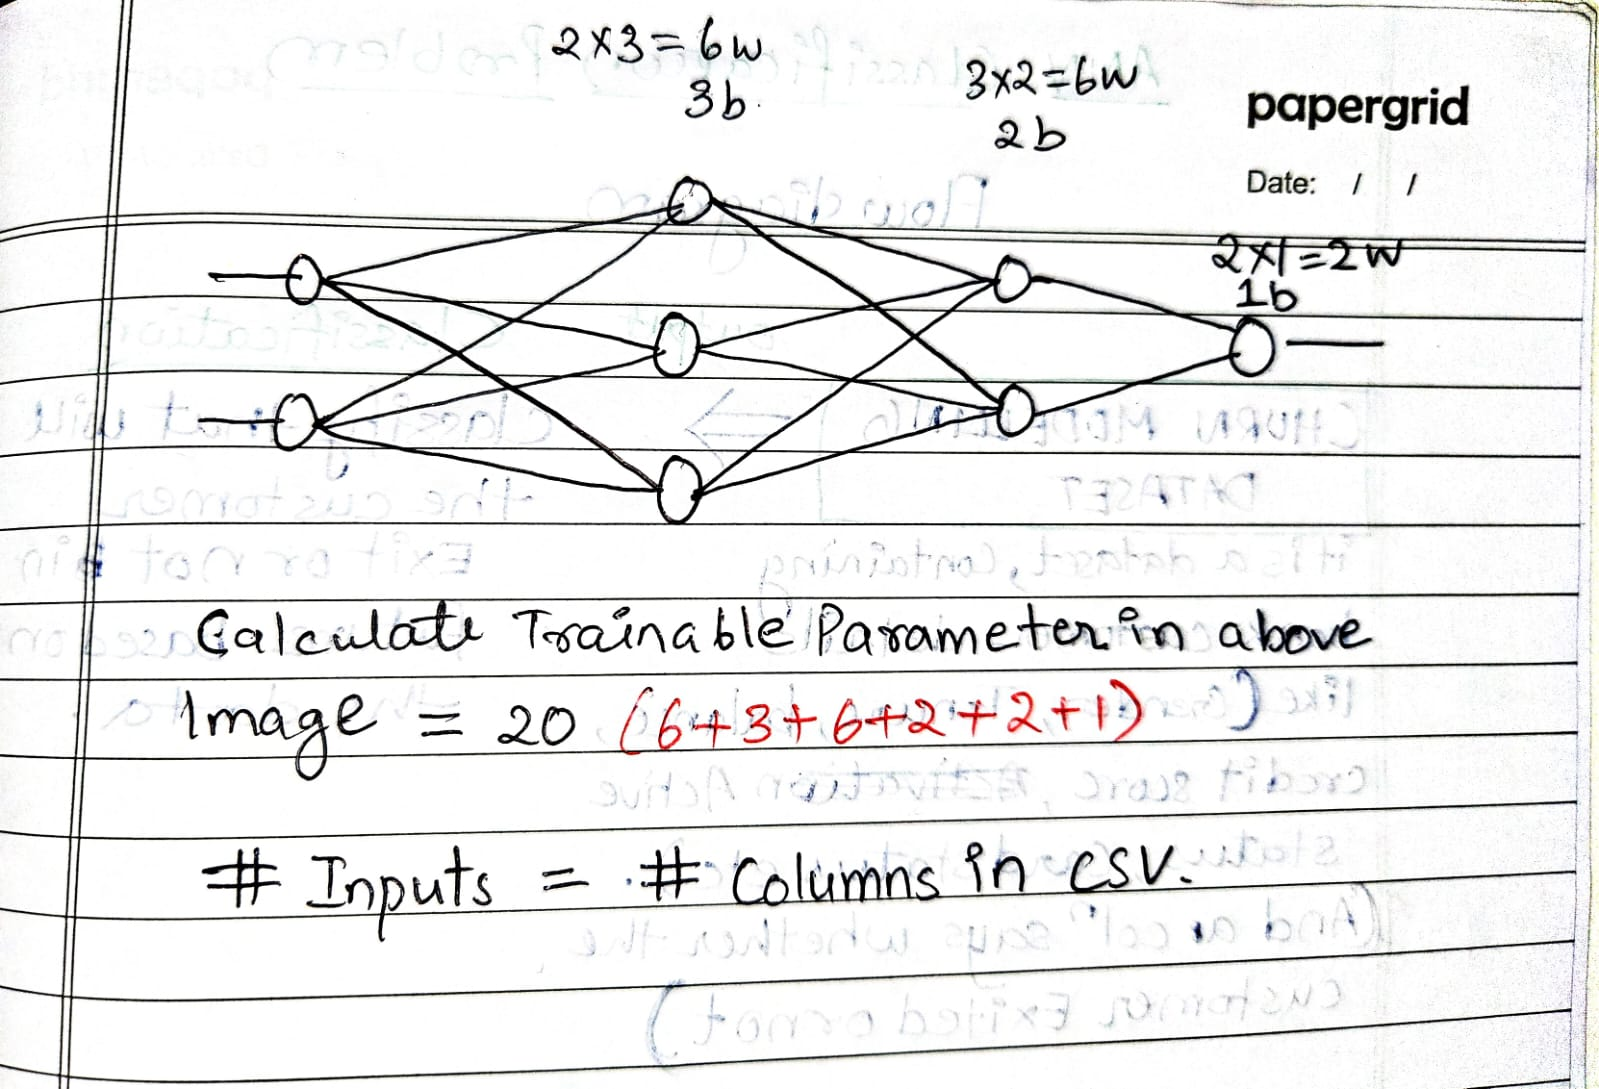

### Steps Involve in Implementing/Training ANN Model:

1. Select model here we are going to use Sequential Model : It's designed for linear stacks of layers.

    - Sequential Model Characteristics:
      - Model Level:
        - A Sequential model accepts one input tensor for the entire model.
        - It produces one output tensor.
        - Data flows through the layers in a linear, ordered sequence without branching or merging.
    
      - Layer Level:
        - Each layer in the Sequential model takes the output of the previous layer as its input.
        - Each layer produces a single output tensor, which is then passed to the next layer.

    - A Sequential model is not appropriate when:
      - Your model has multiple inputs or multiple outputs
      - Any of your layers has multiple inputs or multiple outputs

2. Set Dense class: It is used to define Hidden layer. It's value represent no of neuron in hidden layer.
3. Set Activation parameter in Dense class: Define activation function. 
   -  And for first Dence layer it is ***important to define Input(Shape)***
4. Set Optimizer.
5. Set loss function.
6. Set Metrics: Metrics are evaluation functions used to measure the performance of your model during training and testing 
   - Classification Metrics:
      - accuracy.
      - binary_accuracy: For binary classification tasks.
      - categorical_accuracy: For multi-class classification with one-hot encoded labels.
      - sparse_categorical_accuracy: For multi-class classification with integer labels.

   - Regression Metrics:
      - mean_absolute_error (MAE).
      - mean_squared_error (MSE).

   - Specialized Metrics:
      - AUC
      - Precision: Fraction of true positives among predicted positives.
      - Recall: Fraction of true positives among actual positives.
7. Set Tensorboard: When we train the model we store the logs in a specified folder/directory. then use Tensorborad to visualize the logs as a graph. TensorBoard is a visualization tool used to monitor and debug TensorFlow models. It also stores logs in specified directory.

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

##### Define model (Sequential model), dense layer, Activation function, input shape for 1st dense layer

In [151]:
(indep_train.shape[1],)  # 0 row 1 col
#Input(shape) takes tuple value
# Here 1st entry in tuple is Total no of inputs and 2nd entry is dimension of inputs. Empty means 1D(single value) inputs.

(12,)

In [152]:
#Build ANN model
model = Sequential([
    Input(shape=(indep_train.shape[1],)),  # Define the input layer
    Dense(64,activation='relu'),   ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ##HL2
    Dense(1,activation='sigmoid')  ## output layer
]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

##### Compile the model after defining loss function, Optimizer, metrics

- 2 Ways to define loss function and Optimizer.
  -  Define the name directly during compiling. Here, the default learning rate is used. 
  -  Define it using the Keras function, assign it to variables and use that variable during compiling. Here custom learning rate can be used.

In [153]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()
opt, loss

(<keras.src.optimizers.adam.Adam at 0x23cc51e9b20>,
 <LossFunctionWrapper(<function binary_crossentropy at 0x0000023CC019CB80>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>)

In [154]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model

<Sequential name=sequential_5, built=True>

##### Setting up log directory, EarlyStopping, TensorBoard

In [155]:
#log directory
log_dir = 'log/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  #fit is just a convention showing training logs are stored.
#datetime is used to ensure each folder has unique name


# histogram_freq
# parameter specifies how frequently the histograms of weights and biases will be computed and stored.
# histogram_freq=1 means that the histograms will be logged after each epoch. 
# By default, histogram_freq is set to 0, which means histograms won't be saved.
# Allow you to log weight and bias in a histogram format.

tensorboard_callback = TensorBoard(log_dir= log_dir, histogram_freq=1)

##### EarlyStopping
EarlyStopping is a callback in Keras used to stop training the model when a monitored metric (e.g., loss or accuracy) stops improving for a specified number of epochs or when the model has already converged. This helps to prevent overfitting and saves computational resources.

- parameter
  - monitor='val_loss': This specifies the metric to monitor for early stopping. 
  - patience=10: sets the number of epochs to wait without improvement in the monitored metric (val_loss) before stopping the training.
  - restore_best_weights=True: This ensures that the model's weights are restored to the best weights when the training is stopped early.

In [156]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

##### Train the model, Save the model in pickle or .h5 file 
- .h5 file is similar to pickle file. it support keras that is why using it instead of .pkl file

In [157]:
history = model.fit(
    indep_train,dep_train, validation_data=(indep_test, dep_test), epochs =100,
    callbacks=[tensorboard_callback, early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8172 - loss: 0.4438 - val_accuracy: 0.8535 - val_loss: 0.3486
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8524 - loss: 0.3534 - val_accuracy: 0.8575 - val_loss: 0.3668
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8521 - loss: 0.3533 - val_accuracy: 0.8615 - val_loss: 0.3448
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3376 - val_accuracy: 0.8660 - val_loss: 0.3576
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8629 - loss: 0.3299 - val_accuracy: 0.8600 - val_loss: 0.3425
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.3312 - val_accuracy: 0.8595 - val_loss: 0.3587
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8641 - loss: 0.3328 - val_accuracy: 0.8590 - val_loss: 0.3495
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8661 - loss: 0.3312 - val_accu

In [158]:
model.save('model.h5')

**%load_ext tensorboard**

Used to load the TensorBoard extension. Once loaded, you can run TensorBoard directly within the notebook to visualize your training logs, such as loss, accuracy, and histograms.

**%tensorboard --logdir logs/fit**

This command is used to launch TensorBoard in a Jupyter notebook and visualize training logs.

In [159]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [162]:
%tensorboard --logdir log/fit

Reusing TensorBoard on port 6008 (pid 15944), started 0:00:13 ago. (Use '!kill 15944' to kill it.)